In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
DATA_PATH = '../../../../../Data/Home Credit Default Risk/'

print(os.listdir(DATA_PATH))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [6]:
app_train = pd.read_csv(DATA_PATH + '/application_train.csv')

In [7]:
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
app_test = pd.read_csv(DATA_PATH + '/application_test.csv')

In [9]:
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Exploratory Data Analysis

In [10]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

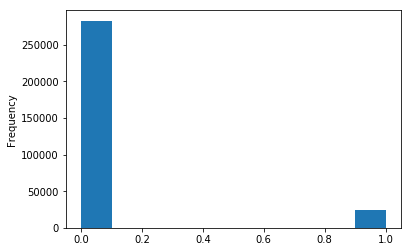

In [11]:
app_train['TARGET'].astype(int).plot.hist()

Examine missing values

In [12]:
len(app_train)

307511

In [13]:
def get_missing_values_table(df):
    missing_values_count_per_column_array = df.isnull().sum()
    
    rows_count = df.shape[0]
    columns_count = df.shape[1]
    
    missing_values_percent_per_column_array = 100 * missing_values_count_per_column_array / rows_count
    
    # create new table with number of missing values count and percentage for each column
    missing_values_table = pd.concat([missing_values_count_per_column_array, missing_values_percent_per_column_array], axis = 1)
    
    # rename the columns
    missing_values_table = missing_values_table.rename(columns = {0:'Missing Values', 1:'% of Total Values'})
    
    # leave only the columns that have missing values
    missing_values_table = missing_values_table[missing_values_table.iloc[:, 1] != 0]
    
    # sort descending by percentage and round to 1 decimal places
    missing_values_table = missing_values_table.sort_values('% of Total Values', ascending=False).round(1)
    
    number_of_columns_with_missing_values = missing_values_table.shape[0]

    # print info
    print(str(number_of_columns_with_missing_values) + " of " + str(columns_count) + " have missing values")
    
    # return the dataframe with missing information
    return missing_values_table

In [14]:
# missing values for training data
missing_values_train_data = get_missing_values_table(app_train)
missing_values_train_data.head(40)

67 of 122 have missing values


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Research the types of columns

In [15]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [16]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [18]:
label_encoded_columns = 0

In [19]:
for column in app_train:
    if app_train[column].dtype == 'object' and pd.Series.nunique(app_train[column]) < 2:
        label_encoder.fit(app_train[column])
        app_train[column] = label_encoder.transform(app_train[column])
        app_test[column] = label_encoder.transform(app_test[column])
        label_encoded_columns += 1

In [20]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [21]:
app_train.shape

(307511, 246)

In [22]:
app_test.shape

(48744, 242)

In [23]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'HOUSETYPE_MODE_terraced house', 'WALLSMATERIAL_MODE_Block',
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=246)

In [24]:
train_labels = app_train['TARGET']

In [25]:
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

In [26]:
app_train['TARGET'] = train_labels

In [27]:
app_train.shape

(307511, 243)

In [28]:
app_test.shape

(48744, 242)

In [29]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [30]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [31]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

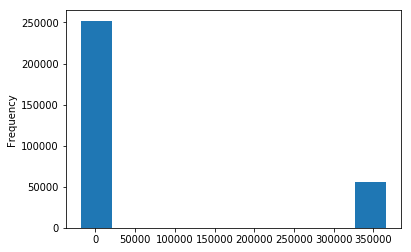

In [32]:
app_train['DAYS_EMPLOYED'].plot.hist()

In [33]:
anomalities = app_train[app_train['DAYS_EMPLOYED'] == 365243]

In [34]:
non_anomalities = app_train[app_train['DAYS_EMPLOYED'] != 365243]

In [35]:
app_train['DAYS_EMPLOYED_ANOMALITIES'] = app_train['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED_ANOMALITIES'] = app_test['DAYS_EMPLOYED'] == 365243

In [36]:
app_train['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace = True)
app_test['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace = True)

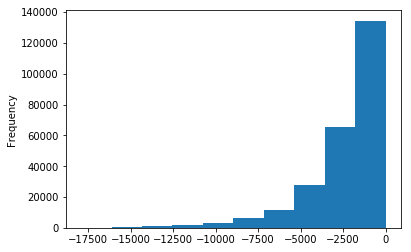

In [37]:
app_train['DAYS_EMPLOYED'].plot.hist()

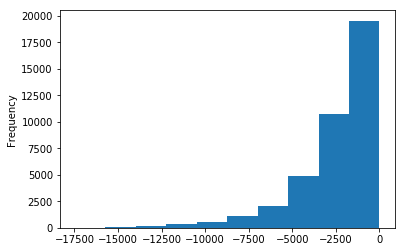

In [38]:
app_test['DAYS_EMPLOYED'].plot.hist()

In [39]:
app_train.shape

(307511, 244)

In [40]:
app_test.shape

(48744, 243)

In [41]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [42]:
app_train['DAYS_BIRTH'].sort_values()

235444     7489
168135     7673
53702      7676
170384     7676
220805     7678
173803     7678
137182     7678
139090     7679
65419      7680
73870      7680
19115      7680
183033     7680
48401      7680
124856     7680
249615     7680
80769      7681
224890     7681
170882     7682
35956      7683
114779     7683
186834     7683
233741     7684
169219     7684
50995      7685
269022     7686
37558      7687
58541      7687
271897     7687
74216      7688
227157     7688
          ...  
120399    25168
263141    25169
164069    25170
274276    25170
298564    25170
76783     25173
228384    25175
282656    25175
216470    25176
187478    25177
130865    25179
119085    25180
20863     25182
49288     25184
65237     25186
271258    25187
140738    25191
276202    25192
172581    25192
79852     25195
282013    25196
226213    25196
173470    25196
169823    25196
169562    25197
130108    25197
143266    25200
124430    25201
63316     25201
265026    25229
Name: DAYS_BIRTH, Length

In [43]:
app_train['DAYS_BIRTH'].corr(-app_train['TARGET'])

0.07823930830982712

In [44]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [45]:
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

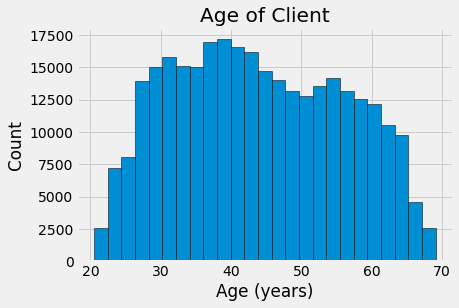

In [46]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [47]:
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

Text(0.5,1,'Distribution of Ages')

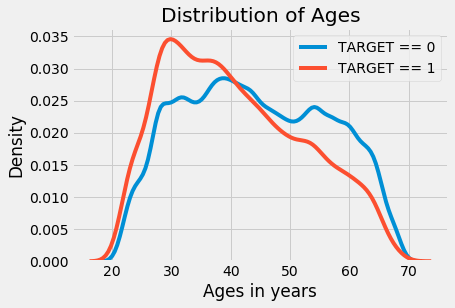

In [52]:
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'TARGET == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'TARGET == 1')
plt.xlabel('Ages in years')
plt.ylabel('Density')
plt.title('Distribution of Ages')

Get age data